<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/03_04_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 특성공학
# 여러 특성을 사용한 다중회귀에 대해서 알아보자.
# 다항 회귀로는 대방어의 무게를 어느정도인지 짐작할 수는 있다( 과소적합?! )
# 과소족합을 해결하려면 제곱보다 더 고차항을 넣어야함
# -> 길이 + 무게 + 높이 + 두께 등.. (타겟에 대한 데이터가 많고 다양할수록 예측정확도가 높아지는구나)

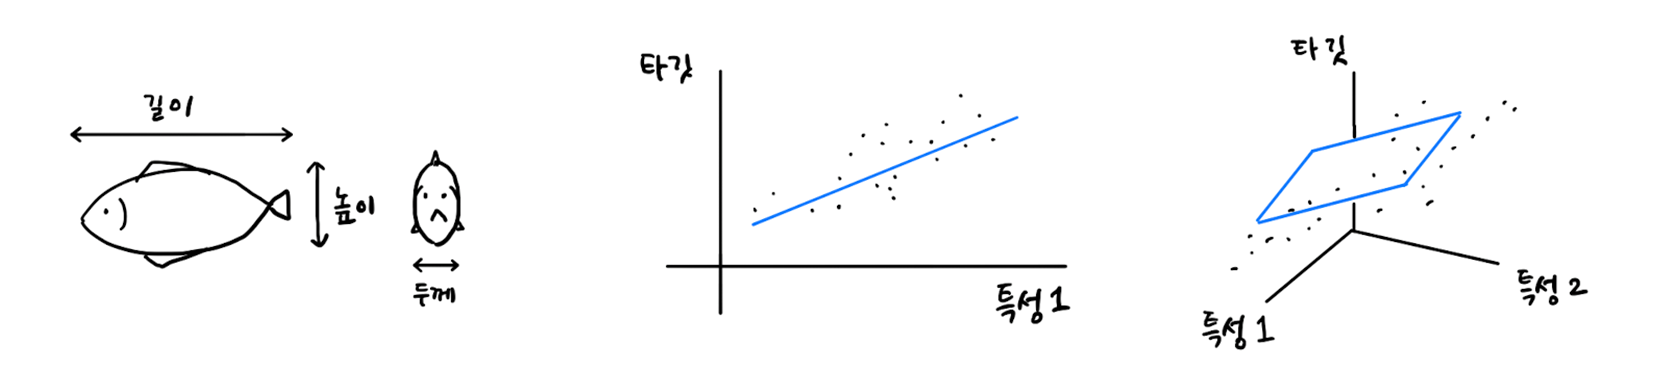

In [1]:
# 다중회귀 : 여러개의 특성을 사용한 선형회귀

# 방어의 길이 뿐만 아니라 방어의 높이와 두께도 특성에 포함하겠다. (특성 -> 3개 )
# 3개의 특성을 제곱하여 추가해야한다
# 각 특성을 서로 곱해서 또 다른 특성을 만들 수 있다.
# 이런 특성을 사용해서 새로운 특성을 뽑아내는 것을 특성공학이라고 함

# 데이터 준비 -> pandas에서 제공하는 데이터 프레임을 사용해보다.
# pandas : 데이터 분석용 라이브러리 (csv -> 배열)

import pandas as pd # 관례적인 pandas 별칭
# 다중회귀 : 물고기의 길이와 무게도 있지만 너비도 존재하니
# 더 자세한 회귀가 도출될거야~ (3차원 공간을 형성)

df = pd.read_csv('https://bit.ly/perch_csv_data') # length, height, width
perch_full = df.to_numpy() # csv 파일을 가져와서 numpy 배열로 변경 (엑셀->메모장일 때 확장자 주로 csv)
print(perch_full) # 3개 특성의 값을 가진 배열

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# length(길이), height(높이), width(너비/두께)
import numpy as np

# 길이, 높이, 너비를 이용하여 무게를 예측해야하니까 정답을 넣어주자(답이 있는 머신러닝!)
# 무게 타깃 (정답파일용)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split
# 사이킷런
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)
# 훈련세트와 테스트 세트로 나눔
print(train_input[0],train_target[0])
# pandas에서 받은 데이터 길이, 높이, 너비 -> 무게

[19.6   5.14  3.04] 85.0


In [4]:
print(train_input.shape,test_input.shape)
# 훈련용 데이터 42개, 특성3개 / 테스트 데이터 14개, 특성 3개

(42, 3) (14, 3)


In [5]:
# 위 데이터를 사용해서 새로운 특성을 만들자
# 사이킷런 변환기 : 특성 생성/ 전처리 클래스가 있다.
# 변환기(Transfomer) : fit(),trainsform() 메서드
from sklearn.preprocessing import PolynomialFeatures # 특성변환기

poly = PolynomialFeatures()
poly.fit([[2,3]])
# 2개의 특성을 가진 2와 3으로 이루어진 샘플 하나를 적용,테스트
print(poly.transform([[2,3]]))
# fit() 메서드와 trainsform() 메서드를 차례대로 실행 ( 훈련 후 변환 )

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# [[1. 2. 3. 4. 6. 9.]]
# 1(bias) 기본값
# 2 fit의 첫번째 값
# 3 fit의 두번째 값
# 4 2**2 (첫번째 값 제곱)
# 6 2*3 (첫번째*두번째)
# 9 3**2 (두번째 값 제곱)

# PolynomiaFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고
# 특성끼리 서로 곱한 항을 추가함
# 무게 = a*길이+b*높이+c*두께+d+1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수입 -> (길이, 높이, 두께, 1 )

In [6]:
poly = PolynomialFeatures(include_bias=False)
#                           1 삭제 (자동으로 절편 항은 무시하지만 알아두면 좋음)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]])) # 특성에 1이 무조건 계산되지 않기 때문에 속도향상됨


[[2. 3. 4. 6. 9.]]


In [7]:
poly.get_feature_names_out() # 특성이 어떻게 만들어졌는지 확인

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [11]:
# 실제로 훈련 시작용 생성
poly = PolynomialFeatures(include_bias=False)
# 사이킷 런의 선형 모델은 자동으로 bias를 추가한다.
# bias 특성을 만들 필요가 없으므로 False
poly.fit(train_input)
train_poly = poly.transform(train_input)
# 42개의 요소에 9개의 특성 -> 공학으로 9개로 늘림

In [12]:
poly.get_feature_names_out() # 특성이 어떻게 만들어 젔는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
#[ 'x0',   'x1',  'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
# length, height, width length^2
#                            length*height
#                                     length*width
#                                                height^2
#                                                      height*width
#                                                                  width^2

In [14]:
test_poly = poly.transform(test_input) # 테스트용 세트 변환
# 전처리 끝====

In [16]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
# 99.03%의 아주 좋은 점수가 나옴 ( 물고기의 길이, 높이, 두께까지 사용한 결과)

0.9903183436982125


In [18]:
print(lr.score(test_poly,test_target))
# 97.14% 농어의 길이만을 사용했을 때에 있던 과소적합 문제는 나타나지 않음

0.9714559911594111


In [20]:
print(poly.degree) # 특성조합 수 기본값 2

2


In [21]:
# 만약 정확한 값을 보기 위해서 특성 조합수를 더 늘리면?
# 특성을 추가하여 3제곱 4제곱 5제곱 항을 추가 degree = 5
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 특성 갯수가 55개로 늘어남 ( 데이터는 42갠데.. ㅋㅋ )

(42, 55)


In [22]:
poly.get_feature_names_out()
# 특성이 어떻게 만들어졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [24]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target)) # 99.99%

0.9999999999996433


In [25]:
print(lr.score(test_poly,test_target)) # -144?!
# 자료보다 특성이 많아서 생긴 결과물

# 특성 갯수를 크게 늘리면 선형모델은 아주 강력해짐
# 하지만 이런 모델은 훈련세트에 너무 과대적합된다!
# 훈련세트 42개 테스트세트 14개 특성 55개

-144.40579436844948


In [ ]:
# 규제 (regularization) : 훈련세트를 너무 과도하게 학습하지 못하게 훼방하는 것
# 훈련세트에 과대적합이 되지 않도록 만드는 것 ( 95% 이내의 확률을 만들자 )

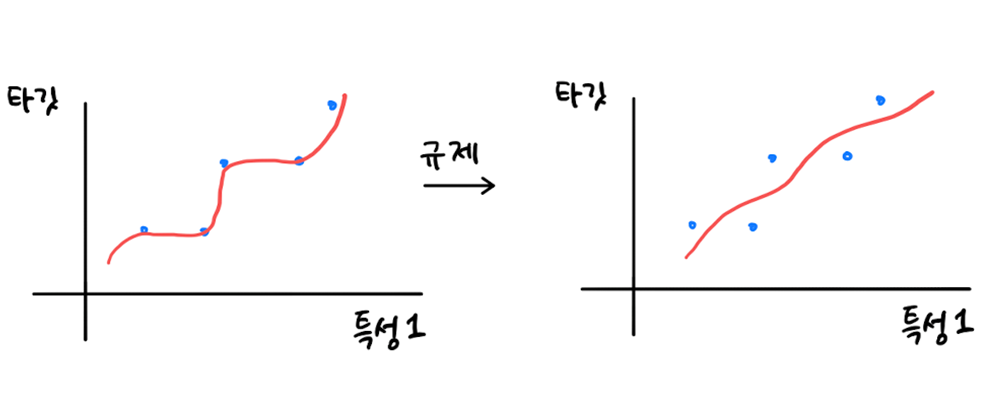

In [27]:
from sklearn.preprocessing import StandardScaler
#사이킷런 데이터 전처리 스케일 조정(스케일러) -> 표준 점수로 변환시켜줌
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly) # 훈련용
test_scaled = ss.transform(test_poly) # 테스트용
# 표준 점수로 변환한 train_scaled, test_scaled 준비 환료
# 평균과 표준편차로 공식을 적용할 필요가 없다 ( 표준점수화 되어있음 )

In [ ]:
# 선형 회귀 모델에 규제를 추가한 모델은 2개가 있다.
# 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제(선호)
# 라쏘(lasso) : 계루의 절대값을 기준으로 규제을 적용 -> 0으로 제공 가능

In [29]:
# 릿지회귀 : 모델 객체를 만들고 fit() -> score()
from sklearn.linear_model import Ridge
ridge = Ridge() # 릿지 클래스를 객체로 생성하고 변수 연결
ridge.fit(train_scaled, train_target) # fit으로 훈련, score로 평가
print(ridge.score(train_scaled, train_target))
# 98.96% 좋은 성능
# 모델 객체 생성시 alpha 매개 변수로 규제의 강도를 조절함

0.9896101671037343


In [30]:
print(ridge.score(test_scaled,test_target))
# 97.90%

0.9790693977615387


In [31]:
# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.
# 모델 객체를 만들 때 alpah 매개값을 주면 됨
# alpha 값을 크게 주면 강도가 세짐 ( 계수값을 더 줄이고 조금 더 과소적합되도록 유도하는 용도)

# 적절한 alpha 값을 찾는 방법은 그래프로 그려봐야 한다.
import matplotlib.pyplot as plt
train_score = [] # 훈련용 - 규제의 알파 농도에 따라서 결과 %를 기록,저장하는 용도
test_score = [] # 테스트용
# alpha 값을 바꿀 때 마다 score() 메서드의 결과 값을 저장할 리스트 생성

In [32]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 10배씩 증가
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 훈련
    ridge.fit(train_scaled,train_target)
    # 훈련점수, 테스트 점수 저장
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

print(f"train_score {train_score}")
print(f"test_score {test_score}")

train_score [0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
test_score [0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


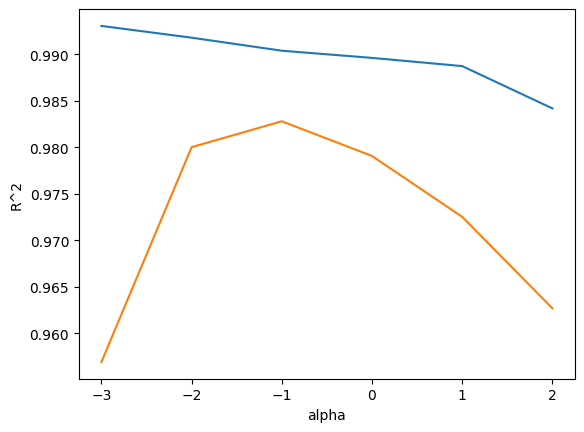

In [40]:
# 위 결과를 차트로 보자!

#.log10(alpha_list) x축 값이 너무 촘촘하게 보일까봐 지수 형식으로 표현
# 0.001 : -3, 0.01 : -2  0.1 : -1
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list), test_score) # 주황색
# plt.plot(np.alpha_list,train_score)
# plt.plot(np.alpha_list,test_score) 이렇게 해보고싶었는데 오류가 나네
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 알파값이 0.1일 때 가장 좋은 점수로 파악됨(-1)

In [41]:
ridge = Ridge(alpha=0.1) # 위에서 확인한 제일 좋은 값으로 적용해서 훈련, 평가
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target)) # 99.03
print(ridge.score(test_scaled,test_target)) # 98.27

0.9903815817570367
0.9827976465386928


In [43]:
# 라쏘로 규제해보기
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_target) # 훈련하고 점수 환산
print(lasso.score(train_scaled,train_target)) # 98.97

0.989789897208096


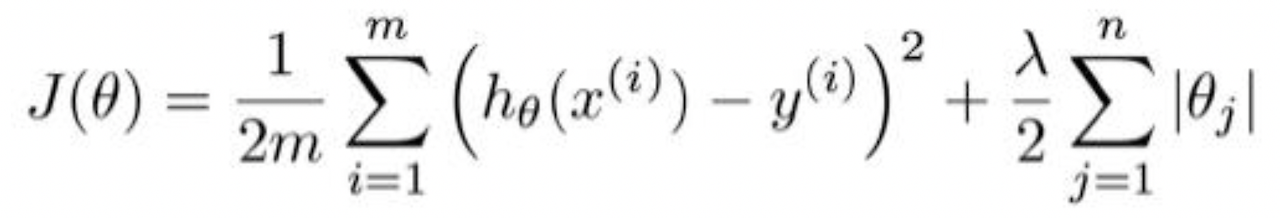

In [44]:
print(lasso.score(test_scaled,test_target)) # 98.00% 라쏘도 릿지만큼의 규제가 적용되어 안정적이다

0.9800593698421883


In [45]:
# 지금 기본값도 안정적이지만 라쏘도 릿지처럼 알파값을 조절하면 더 좋은 값을 찾을 수 있을지도?
train_score = []
test_score = []

alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=10000) # 정확도를 위해 최대 반복횟수 지정
    # 라쏘 모델은 최적의 계수를 찾기위해 반복적인 계산을 수행함
    # 훈련
    lasso.fit(train_scaled,train_target)
    # 평가 저장
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

print(f"train_score {train_score}")
print(f"test_score {test_score}")
# 라쏘 테스트시 반복계산을 하는데 지정한 반복횟수가 부족하면 경고가 발생  ConvergenceWarning

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


train_score [0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
test_score [0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


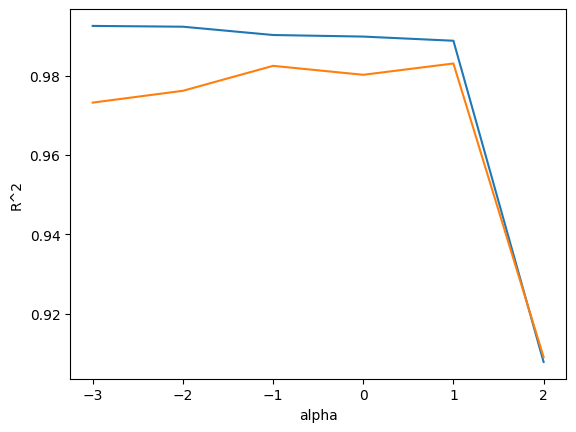

In [46]:
# 차트화
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list),test_score) # 주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 왼쪽은 과대적합, 오른쪽은 정상 (제일 좋은 값은 1(10)) -> 알파값 10일때가 결과가 좋다

In [47]:
# 라쏘 모델의 최적의 알파값은 1 -> 10^1 = 10
lasso =Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target)) # 98.88%
print(lasso.score(test_scaled,test_target)) # 98.24%

0.9888067471131867
0.9824470598706695
